#### Putting It All Together

As you might have guessed from the last notebook, using all of the variables was allowing you to drastically overfit the training data.  This was great for looking good in terms of your Rsquared on these points.  However, this was not great in terms of how well you were able to predict on the test data.

We will start where we left off in the last notebook.  First read in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Question 1

**1.** To begin fill in the format function below with the correct variable.  Notice each **{ }** holds a space where one of your variables will be added to the string.  This will give you something to do while the the function does all the steps you did throughout this lesson.

In [3]:
a = 'test_score'
b = 'train_score'
c = 'linear model (lm_model)'
d = 'X_train and y_train'
e = 'X_test'
f = 'y_test'
g = 'train and test data sets'
h = 'overfitting'

q1_piat = '''In order to understand how well our {} fit the dataset, 
            we first needed to split our data into {}.  
            Then we were able to fit our {} on the {}.  
            We could then predict using our {}  by providing 
            the linear model the {} for it to make predictions.  
            These predictions were for {}. 

            By looking at the {}, it looked like we were doing awesome because 
            it was 1!  However, looking at the {} suggested our model was not 
            extending well.  The purpose of this notebook will be to see how 
            well we can get our model to extend to new data.
            
            This problem where our data fits the training data well, but does
            not perform well on test data is commonly known as 
            {}.'''.format(c, g, c, d, c, e, f, b, a, h) #replace a with the correct variable
print(q1_piat)

In order to understand how well our linear model (lm_model) fit the dataset, 
            we first needed to split our data into train and test data sets.  
            Then we were able to fit our linear model (lm_model) on the X_train and y_train.  
            We could then predict using our linear model (lm_model)  by providing 
            the linear model the X_test for it to make predictions.  
            These predictions were for y_test. 

            By looking at the train_score, it looked like we were doing awesome because 
            it was 1!  However, looking at the test_score suggested our model was not 
            extending well.  The purpose of this notebook will be to see how 
            well we can get our model to extend to new data.
            
            This problem where our data fits the training data well, but does
            not perform well on test data is commonly known as 
            overfitting.


In [4]:
# Print the solution order of the letters in the format
t.q1_piat_answer()

This one is tricky - here is the order of the letters for the solution we had in mind:
 c, g, c, d, c, e, f, b, a, h


#### Question 2

**2.** Now, we need to improve the model . Use the dictionary below to provide the true statements about improving **this model**.  **Also consider each statement as a stand alone**.  Though, it might be a good idea after other steps, which would you consider a useful **next step**?

In [7]:
a = 'yes'
b = 'no'

q2_piat = {'add interactions, quadratics, cubics, and other higher order terms': b, 
           'fit the model many times with different rows, then average the responses': a,
           'subset the features used for fitting the model each time': a,
           'this model is hopeless, we should start over': b}

In [8]:
#Check your solution
t.q2_piat_check(q2_piat)

Nice job! That looks right!  These two techniques are really common in Machine Learning algorithms to combat overfitting.  Though the first technique could be useful, it is not likely to help us right away with our current model.  These additional features would likely continue to worsen the nature of overfitting we are seeing here.


##### Question 3

**3.** Before we get too far along, follow the steps in the function below to create the X (explanatory matrix) and y (response vector) to be used in the model.  If your solution is correct, you should see a plot similar to the one shown in the Screencast.

In [19]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

### Run the Cell Below to Acheive the Results Needed for Question 4

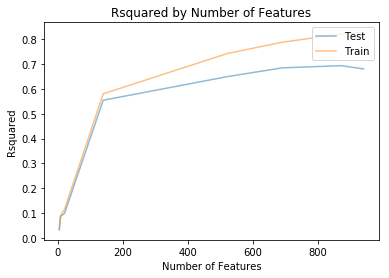

In [20]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

#### Question 4

**4.** Use the output and above plot to correctly fill in the keys of the **q4_piat** dictionary with the correct variable.  Notice that only the optimal model results are given back in the above - they are stored in **lm_model**, **X_train**, **X_test**, **y_train**, and **y_test**.  If more than one answer holds, provide a tuple holding all the correct variables in the order of first variable alphabetically to last variable alphabetically.

In [21]:
# Cell for your computations to answer the next question
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2


872
0.693633772593
0.821115571727


In [22]:
a = 'we would likely have a better rsquared for the test data.'
b = 1000
c = 872
d = 0.69
e = 0.82
f = 0.88
g = 0.72
h = 'we would likely have a better rsquared for the training data.'

q4_piat = {'The optimal number of features based on the results is':c, 
               'The model we should implement in practice has a train rsquared of': e, 
               'The model we should implement in practice has a test rsquared of': d,
               'If we were to allow the number of features to continue to increase': h
}

In [23]:
#Check against your solution
t.q4_piat_check(q4_piat)

Nice job! That looks right!  We can see that the model we should impement was the 6th model using 1088 features.  It is the model that has the best test rsquared value.


#### Question 5

**5.** The default penalty on coefficients using linear regression in sklearn is a ridge (also known as an L2) penalty.  Because of this penalty, and that all the variables were normalized, we can look at the size of the coefficients in the model as an indication of the impact of each variable on the salary.  The larger the coefficient, the larger the expected impact on salary.  

Use the space below to take a look at the coefficients.  Then use the results to provide the **True** or **False** statements based on the data.

#### Run the below to complete the following dictionary

In [24]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
36,Country_United States,55281.225281,55281.225281
24,Country_Norway,54469.173923,54469.173923
7,Country_Australia,42745.068641,42745.068641
349,Currency_Swiss francs,42339.353397,42339.353397
13,Country_Denmark,35599.977732,35599.977732
110,YearsCodedJob_18 to 19 years,34767.946905,34767.946905
19,Country_Israel,33837.308852,33837.308852
23,Country_New Zealand,30354.907073,30354.907073
113,YearsCodedJob_20 or more years,29531.537917,29531.537917
33,Country_Switzerland,28531.983377,28531.983377


In [ ]:
a = True
b = False

#According to the data...
q5_piat = {'Country appears to be one of the top indicators for salary': a,
               'Gender appears to be one of the indicators for salary': b, 
               'How long an individual has been programming appears to be one of the top indicators for salary': a,
               'The longer an individual has been programming the more they are likely to earn': b}

In [26]:
t.q5_piat_check(q5_piat)

Oops!  It appears that country and years of experience are indicators of salary values.  However, gender columns did not appear in the top 20 features.  Additionally, the years of programming didn't follow an always increasing order.  Therefore, it wasn't necessarily the case that longer you have programmed leads to higher salary based on the data.


#### Congrats of some kind

Congrats!  Hopefully this was a great review, or an eye opening experience about how to put the steps together for an analysis.  List the steps.  In the next lesson, you will look at how take this and show it off to others so they can act on it.